游늵 Distribui칞칚o dos valores de cada feature:
            HighBP     HighChol    CholCheck          BMI       Smoker  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.591000     0.530000     0.983000    29.217000     0.446000   
std       0.491895     0.499349     0.129336     6.218085     0.497324   
min       0.000000     0.000000     0.000000    16.000000     0.000000   
25%       0.000000     0.000000     1.000000    25.000000     0.000000   
50%       1.000000     1.000000     1.000000    28.000000     0.000000   
75%       1.000000     1.000000     1.000000    32.000000     1.000000   
max       1.000000     1.000000     1.000000    59.000000     1.000000   

            Stroke  HeartDiseaseorAttack  PhysActivity       Fruits  \
count  1000.000000           1000.000000   1000.000000  1000.000000   
mean      0.066000              0.134000      0.636000     0.578000   
std       0.248406              0.340823      0.481389     0.494126   
min 

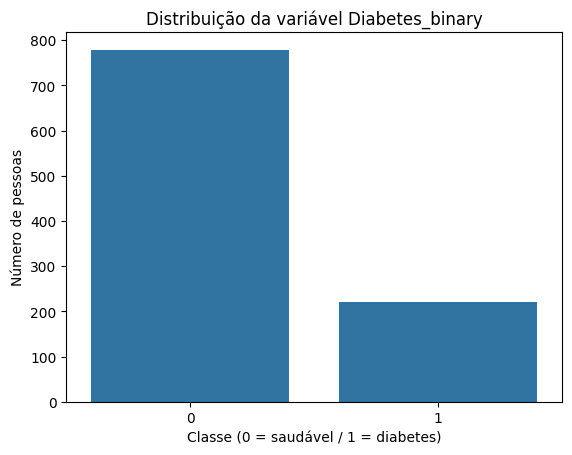


游댍 Vari칙ncia das features:
CholCheck                0.016728
HvyAlcoholConsump        0.030069
AnyHealthcare            0.040276
Stroke                   0.061706
NoDocbcCost              0.092483
HeartDiseaseorAttack     0.116160
Veggies                  0.188187
DiffWalk                 0.212187
Sex                      0.227123
PhysActivity             0.231736
HighBP                   0.241961
Fruits                   0.244160
Smoker                   0.247331
HighChol                 0.249349
Education                1.108748
GenHlth                  1.208520
Income                   4.978754
Age                      7.111350
BMI                     38.664576
MentHlth                70.434305
PhysHlth                98.587832
dtype: float64

丘뒲잺 Propor칞칚o das classes em y (Diabetes_binary):
Diabetes_binary
0    0.779
1    0.221
Name: proportion, dtype: float64

游빌 Features com baixa vari칙ncia (< 0.01):
Series([], dtype: float64)


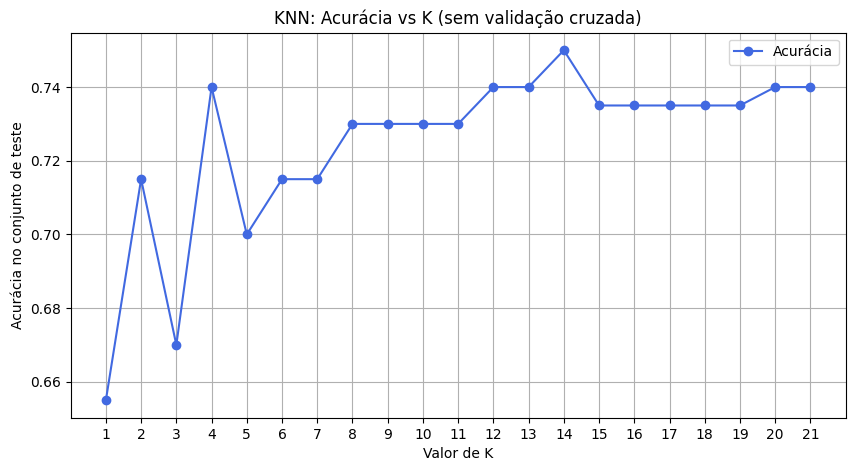

Melhor valor de K: 14 com acur치cia 0.7500


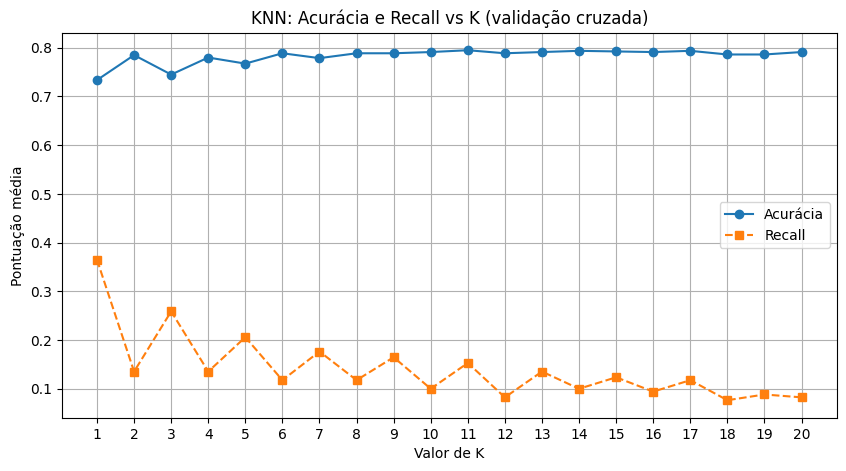

In [2]:
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline



# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
#print(cdc_diabetes_health_indicators.metadata)

# variable information
#print(cdc_diabetes_health_indicators.variables)


y = y["Diabetes_binary"]

X = X.head(1000)
y = y.head(1000)
# print(X.head(10))

def diagnostico_dataset(X, y):
    print("游늵 Distribui칞칚o dos valores de cada feature:")
    print(X.describe())
    sns.countplot(x=y)
    plt.title("Distribui칞칚o da vari치vel Diabetes_binary")
    plt.xlabel("Classe (0 = saud치vel / 1 = diabetes)")
    plt.ylabel("N칰mero de pessoas")
    plt.show()

    print("\n游댍 Vari칙ncia das features:")
    print(X.var().sort_values())

    print("\n丘뒲잺 Propor칞칚o das classes em y (Diabetes_binary):")
    print(y.value_counts(normalize=True))

    print("\n游빌 Features com baixa vari칙ncia (< 0.01):")
    baixa_var = X.var()[X.var() < 0.01]
    print(baixa_var)

diagnostico_dataset(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def melhor_knn_acuracia():
    k_values = range(1, 22)
    accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    plt.figure(figsize=(10, 5))
    plt.plot(k_values, accuracies, marker='o', label="Acur치cia", color="royalblue")
    plt.xlabel("Valor de K")
    plt.ylabel("Acur치cia no conjunto de teste")
    plt.title("KNN: Acur치cia vs K (sem valida칞칚o cruzada)")
    plt.xticks(k_values)
    plt.grid(True)
    plt.legend()
    plt.show()

    best_k = k_values[np.argmax(accuracies)]
    maior = max(accuracies)
    print(f"Melhor valor de K: {best_k} com acur치cia {maior:.4f}")

melhor_knn_acuracia()


def melhor_knn_valid_cruzada():
    k_values = range(1, 21)
    accuracies = []
    recalls = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        acc = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
        recall = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='recall').mean()

        accuracies.append(acc)
        recalls.append(recall)

    plt.figure(figsize=(10, 5))
    plt.plot(k_values, accuracies, marker='o', label="Acur치cia")
    plt.plot(k_values, recalls, marker='s', label="Recall", linestyle='--')
    plt.xlabel("Valor de K")
    plt.ylabel("Pontua칞칚o m칠dia")
    plt.title("KNN: Acur치cia e Recall vs K (valida칞칚o cruzada)")
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

melhor_knn_valid_cruzada()

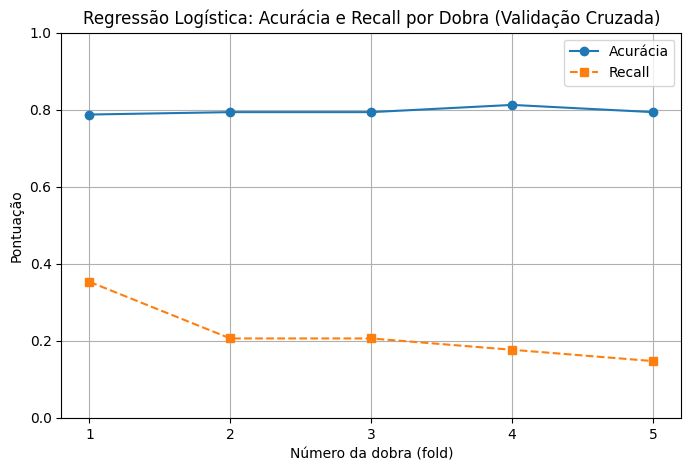

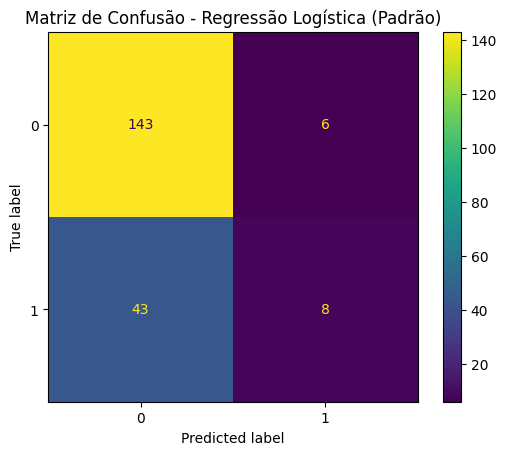

游댌 Melhor combina칞칚o de hiperpar칙metros: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}


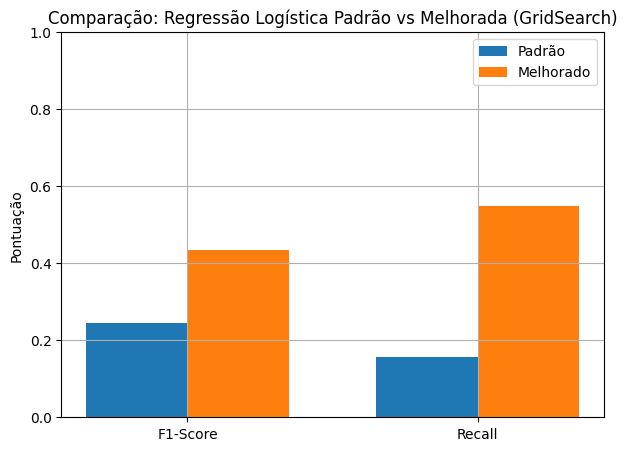

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score



def avalia_logreg_pontuacoes(X_train_scaled, y_train):
    model = LogisticRegression(solver='liblinear')

    acc = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    recall = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='recall')

    return acc, recall

def plota_resultado_logreg(acc_scores, recall_scores):
    folds = range(1, len(acc_scores) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(folds, acc_scores, marker='o', label="Acur치cia")
    plt.plot(folds, recall_scores, marker='s', label="Recall", linestyle='--')
    plt.title("Regress칚o Log칤stica: Acur치cia e Recall por Dobra (Valida칞칚o Cruzada)")
    plt.xlabel("N칰mero da dobra (fold)")
    plt.ylabel("Pontua칞칚o")
    plt.ylim(0, 1)
    plt.xticks(folds)
    plt.grid(True)
    plt.legend()
    plt.show()

acc_scores, recall_scores = avalia_logreg_pontuacoes(X_train_scaled, y_train)
plota_resultado_logreg(acc_scores, recall_scores)



# Instancia e treina o modelo
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train_scaled, y_train)

# Previs칫es
y_pred = logreg.predict(X_test_scaled)

# Matriz de confus칚o
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confus칚o - Regress칚o Log칤stica (Padr칚o)")
plt.show()





# Define o modelo base
logreg = LogisticRegression(solver="liblinear")

# Grade de hiperpar칙metros a testar
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

# Busca com valida칞칚o cruzada
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
grid.fit(X_train_scaled, y_train)

# Melhor modelo e seus par칙metros
best_model = grid.best_estimator_
print("游댌 Melhor combina칞칚o de hiperpar칙metros:", grid.best_params_)




def compara_modelos(modelo1, modelo2, X_test_scaled, y_test):
    y_pred1 = modelo1.predict(X_test_scaled)
    y_pred2 = modelo2.predict(X_test_scaled)

    f1_1 = f1_score(y_test, y_pred1)
    f1_2 = f1_score(y_test, y_pred2)

    recall_1 = recall_score(y_test, y_pred1)
    recall_2 = recall_score(y_test, y_pred2)

    plt.figure(figsize=(7, 5))
    bar_width = 0.35
    labels = ['F1-Score', 'Recall']

    plt.bar(np.arange(2), [f1_1, recall_1], width=bar_width, label='Padr칚o')
    plt.bar(np.arange(2) + bar_width, [f1_2, recall_2], width=bar_width, label='Melhorado')

    plt.xticks(np.arange(2) + bar_width / 2, labels)
    plt.ylabel("Pontua칞칚o")
    plt.ylim(0, 1)
    plt.title("Compara칞칚o: Regress칚o Log칤stica Padr칚o vs Melhorada (GridSearch)")
    plt.legend()
    plt.grid(True)
    plt.show()



# Modelo padr칚o
modelo_padrao = LogisticRegression(solver="liblinear")
modelo_padrao.fit(X_train_scaled, y_train)

# Melhor modelo com hiperpar칙metros
modelo_melhorado = grid.best_estimator_

# Comparar
compara_modelos(modelo_padrao, modelo_melhorado, X_test_scaled, y_test)

